In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection



to generate data, run morpheus with the provided model.xml multiple times to gather statistics

In [ ]:

#iterate over simulation replicates

X = []
Y = []
for i in range(259,274):
    folder_path = f'morpheus_{i}'
    csv_file = os.path.join(folder_path, 'logger.csv')
    
    # Skip if the folder or CSV file does not exist
    if not os.path.exists(folder_path) or not os.path.exists(csv_file):
        continue

    # Load the CSV file
    data = pd.read_csv(csv_file, delimiter='\t')
    data = data[data['cell.type'] == 2]

    # Extract x, y coordinates and calculate mean per time point
    num_cells = len(data[data['time'] == 0.1])
    grouped_data = data.groupby('time').mean().reset_index()
    x = grouped_data['cell.center.x'].values
    y = grouped_data['cell.center.y'].values

    x = x-x[0]
    y = y-y[0]
    X.append(x)
    Y.append(y)
X = np.column_stack(X)
Y = np.column_stack(Y)


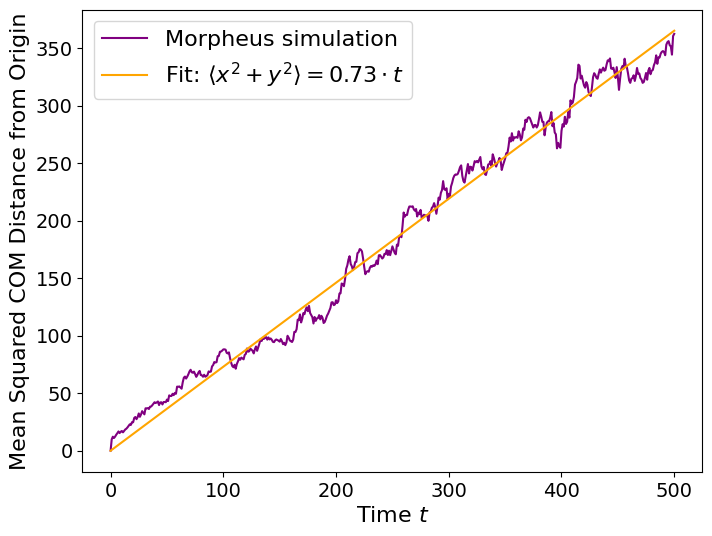

In [ ]:
# Calculate the mean of D along axis 1
D = X**2+Y**2
mean_D = np.mean(D, axis=1)

# Perform a linear fit with intercept set to 0
A = np.vstack([np.arange(len(mean_D))]).T
coefficients, _, _, _ = np.linalg.lstsq(A, mean_D, rcond=None)

# Generate the fitted line
fitted_line = coefficients[0] * np.arange(len(mean_D))

# Plot the original data and the fitted line
plt.figure(figsize=(8, 6))  # Adjust the figure size to match the proportions of the attached figure
plt.plot(mean_D, label='Morpheus simulation', color='purple')
# Plot the fitted line
# plt.plot(fitted_line, label=f'Fitted Line (slope={coefficients[0]:.2f})', linestyle='--')
plt.plot(fitted_line, label=r'Fit: $\langle x^2+y^2\rangle=0.73\cdot t$', color='orange')
plt.xlabel(r'Time $t$', fontsize=16)
plt.ylabel('Mean Squared COM Distance from Origin', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

